<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Predicting the housing resale prices of HDB resale flats in Singapore

## Problem Statement

- In Singapore, getting a HDB is probably one of the biggest financial decisions many Singaporeans will have to make, given its exhorbitant cost. Furthermore, given the fluctuating property prices in the market throughout the recent decade as a result several cooling measures and increasing demand, making a wrong decision could set one back several years in terms of opportunity cost & time value of money. As a Data Scientist employed by an online social networking service headquarterd in Singapore, our team has been requested by the management to design a predictive model that can help property and housing agents in the market to offer prediction services of HDB resale prices, so that they can offer informed consulting advice to their clients.

- In this project, we seek to build a Linear Regression model and evaluate its feasibility in predicting the housing prices of HDB resale flats in Singapore through the selection of several key features, so as to help Singaporeans make more informed decisions on the different types of resale flats available in the property market. We will be basing the criteria metric by aiming for a high R2(R-square) score and low RMSE(Root-Mean Sqaure) score so as to minimise the error cost during the prediction of HDB resale prices in order to reduce the amount of financial errors that clients can incur.

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [Datasets to be passed for modelling](#Datasets-to-be-passed-for-modelling)

## Import Libraries for Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Codebook / Data Dictionary:

- resale_price: the property's sale price in Singapore dollars. This is the target variable that you're trying to predict for this challenge.
- Tranc_YearMonth: year and month of the resale transaction, e.g. 2015-02
- town: HDB township where the flat is located, e.g. BUKIT MERAH
- flat_type: type of the resale flat unit, e.g. 3 ROOM
- block: block number of the resale flat, e.g. 454
- street_name: street name where the resale flat resides, e.g. TAMPINES ST 42
- storey_range: floor level (range) of the resale flat unit, e.g. 07 TO 09
- floor_area_sqm: floor area of the resale flat unit in square metres
- flat_model: HDB model of the resale flat, e.g. Multi Generation
- lease_commence_date: commencement year of the flat unit's 99-year lease
- Tranc_Year: year of resale transaction
- Tranc_Month: month of resale transaction
- mid_storey: median value of storey_range
- lower: lower value of storey_range
- upper: upper value of storey_range
- mid: middle value of storey_range
- full_flat_type: combination of flat_type and flat_model
- address: combination of block and street_name
- floor_area_sqft: floor area of the resale flat unit in square feet
- hdb_age: number of years from lease_commence_date to present year
- max_floor_lvl: highest floor of the resale flat
- year_completed: year which construction was completed for resale flat
- residential: boolean value if resale flat has residential units in the same block
- commercial: boolean value if resale flat has commercial units in the same block
- market_hawker: boolean value if resale flat has a market or hawker centre in the same block
- multistorey_carpark: boolean value if resale flat has a multistorey carpark in the same block
- precinct_pavilion: boolean value if resale flat has a pavilion in the same block
- total_dwelling_units: total number of residential dwelling units in the resale flat
- 1room_sold: number of 1-room residential units in the resale flat
- 2room_sold: number of 2-room residential units in the resale flat
- 3room_sold: number of 3-room residential units in the resale flat
- 4room_sold: number of 4-room residential units in the resale flat
- 5room_sold: number of 5-room residential units in the resale flat
- exec_sold: number of executive type residential units in the resale flat block
- multigen_sold: number of multi-generational type residential units in the resale flat block
- studio_apartment_sold: number of studio apartment type residential units in the resale flat block
- 1room_rental: number of 1-room rental residential units in the resale flat block
- 2room_rental: number of 2-room rental residential units in the resale flat block
- 3room_rental: number of 3-room rental residential units in the resale flat block
- other_room_rental: number of "other" type rental residential units in the resale flat block
- postal: postal code of the resale flat block
- Latitude: Latitude based on postal code
- Longitude: Longitude based on postal code
- planning_area: Government planning area that the flat is located
- Mall_Nearest_Distance: distance (in metres) to the nearest mall
- Mall_Within_500m: number of malls within 500 metres
- Mall_Within_1km: number of malls within 1 kilometre
- Mall_Within_2km: number of malls within 2 kilometres
- Hawker_Nearest_Distance: distance (in metres) to the nearest hawker centre
- Hawker_Within_500m: number of hawker centres within 500 metres
- Hawker_Within_1km: number of hawker centres within 1 kilometre
- Hawker_Within_2km: number of hawker centres within 2 kilometres
- hawker_food_stalls: number of hawker food stalls in the nearest hawker centre
- hawker_market_stalls: number of hawker and market stalls in the nearest hawker centre
- mrt_nearest_distance: distance (in metres) to the nearest MRT station
- mrt_name: name of the nearest MRT station
- bus_interchange: boolean value if the nearest MRT station is also a bus interchange
- mrt_interchange: boolean value if the nearest MRT station is a train interchange station
- mrt_latitude: latitude (in decimal degrees) of the the nearest MRT station
- mrt_longitude: longitude (in decimal degrees) of the nearest MRT station
- bus_stop_nearest_distance: distance (in metres) to the nearest bus stop
- bus_stop_name: name of the nearest bus stop
- bus_stop_latitude: latitude (in decimal degrees) of the the nearest bus stop
- bus_stop_longitude: longitude (in decimal degrees) of the nearest bus stop
- pri_sch_nearest_distance: distance (in metres) to the nearest primary school
- pri_sch_name: name of the nearest primary school
- vacancy: number of vacancies in the nearest primary school
- pri_sch_affiliation: boolean value if the nearest primary school has a secondary school affiliation
- pri_sch_latitude: latitude (in decimal degrees) of the the nearest primary school
- pri_sch_longitude: longitude (in decimal degrees) of the nearest primary school
- sec_sch_nearest_dist: distance (in metres) to the nearest secondary school
- sec_sch_name: name of the nearest secondary school
- cutoff_point: PSLE cutoff point of the nearest secondary school
- affiliation: boolean value if the nearest secondary school has an primary school affiliation
- sec_sch_latitude: latitude (in decimal degrees) of the the nearest secondary school
- sec_sch_longitude: longitude (in decimal degrees) of the nearest secondary school

In [2]:
pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 200)

## Data Import and Cleaning

In [3]:
hdb = pd.read_csv('../datasets/train.csv')
hdb.shape

/var/folders/9p/c0_nrg612wgdbjkrj5ttb5z40000gn/T/ipykernel_37698/3283657896.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv('datasets/train.csv')


(150634, 78)

In [4]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
hdb.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_m

In [6]:
hdb.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,1046.235290,434.130280,28.551536,15.139816,1990.922906,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,1.366224,103.839391,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,0.546364,0.264024,1.365667,103.839400,115.258966,1.366231,103.839369,395.172974,55.368190,0.113195,1.366268,103.839106,508.533220,210.146428,0.031879,1.365986,103.839340
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,262.674321,104.797180,12.138829,6.232492,12.202185,58.349670,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,2.028341,11.193820,0.669842,0.024305,0.042850,0.072506,368.739209,0.624275,1.287372,3.453332,1076.701337,0.652205,1.630609,3.955697,19.13878,55.495519,429.366039,0.497847,0.440814,0.042563,0.072582,55.572855,0.042865,0.072520,234.760931,17.903918,0.316832,0.042669,0.072637,309.066265,20.010489,0.175677,0.042599,0.072630
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,205.108901,2.000000,2.000000,1949.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,103.685228,0.000000,1.000000,1.000000,1.000000,1.873295,1.000000,1.000000,1.000000,0.00000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,364.973191,20.000000,12.000000,1983.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.336285,103.774859,391.473823,1.000000,1.000000,3.000000,372.132398,1.000000,1.000000,1.000000,40.00000,0.000000,458.266301,0.000000,0.000000,1.336358,103.773982,75.032491,1.336405,103.774414,227.083163,44.000000,0.000000,1.337289,103.773754,290.285883,188.000000,0.000000,1.337545,103.776008
50%,93077.500000,95.00000,1992.000000,4

### Imputation of Null values 

In [7]:
hdb.isnull().sum().sort_values(ascending=False).head(10)

Hawker_Within_500m         97390
Mall_Within_500m           92789
Hawker_Within_1km          60868
Hawker_Within_2km          29202
Mall_Within_1km            25426
Mall_Within_2km             1940
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
mrt_nearest_distance           0
hawker_market_stalls           0
dtype: int64

- Missing data is observed for the Mall/Hawker radial distances columns. 
- Upon closer examination, we can proceed to drop null values in Mall_Nearest_Distance column as it only accounts for <5% of the total data, and this will not impact the overall data integrity

In [8]:
#Drop NA values in Mall_Nearest_Distance as it accounts for <5% of total data
hdb.dropna(subset=['Mall_Nearest_Distance'], inplace=True)

In [9]:
hdb.shape

(149805, 78)

In [10]:
hdb[hdb['Hawker_Within_2km'].isnull()][['Hawker_Nearest_Distance', 'Hawker_Within_2km']].sort_values(by = 'Hawker_Nearest_Distance', ascending=True).head(5)

,Hawker_Nearest_Distance,Hawker_Within_2km
43430,2000.871907,NaN
115901,2000.871907,NaN
90915,2000.871907,NaN
91533,2000.871907,NaN
8001,2000.871907,NaN


In [11]:
hdb[hdb['Hawker_Within_500m'].isnull()][['Hawker_Nearest_Distance', 'Hawker_Within_500m']].sort_values(by='Hawker_Nearest_Distance', ascending=True).head(5)

,Hawker_Nearest_Distance,Hawker_Within_500m
36427,500.208726,NaN
86071,500.208726,NaN
104421,500.208726,NaN
23788,500.208726,NaN
59745,500.208726,NaN


In [12]:
hdb[hdb['Hawker_Within_1km'].isnull()][['Hawker_Nearest_Distance', 'Hawker_Within_1km']].sort_values(by='Hawker_Nearest_Distance', ascending=True).head(5)

,Hawker_Nearest_Distance,Hawker_Within_1km
60077,1000.216189,NaN
130417,1000.216189,NaN
114661,1000.216189,NaN
59523,1000.216189,NaN
7055,1000.216189,NaN


Upon examination of the above data columns with missing data,  we can observe that **only** flats with nearest hawker distance above the given threshold radial distance measuring the number of hawker centers/malls, have null values in them. Hence, we can safely impute zeros to these null values as there will be no hawker centers/malls below this nearest distance

In [13]:
#Impute zeroes to all hawker centers/malls radial threshold distance with missing values based on our above analysis
hdb['Hawker_Within_500m'] = hdb['Hawker_Within_500m'].fillna(0.0)
hdb['Hawker_Within_1km'] = hdb['Hawker_Within_1km'].fillna(0.0)
hdb['Hawker_Within_2km'] = hdb['Hawker_Within_2km'].fillna(0.0)
hdb['Mall_Within_1km'] = hdb['Mall_Within_1km'].fillna(0.0)
hdb['Mall_Within_2km'] = hdb['Mall_Within_2km'].fillna(0.0)
hdb['Mall_Within_500m'] = hdb['Mall_Within_500m'].fillna(0.0)

In [14]:
hdb['Hawker_Within_500m'].value_counts()

0.0    96682
1.0    37042
2.0    12558
3.0     2834
4.0      647
5.0       42
Name: Hawker_Within_500m, dtype: int64

In [15]:
hdb.isnull().sum().sort_values(ascending=False).head(10)

id                         0
Mall_Within_2km            0
mrt_nearest_distance       0
hawker_market_stalls       0
hawker_food_stalls         0
Hawker_Within_2km          0
Hawker_Within_1km          0
Hawker_Within_500m         0
Hawker_Nearest_Distance    0
Mall_Within_1km            0
dtype: int64

In [16]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149805 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   Tranc_YearMonth            149805 non-null  object 
 2   town                       149805 non-null  object 
 3   flat_type                  149805 non-null  object 
 4   block                      149805 non-null  object 
 5   street_name                149805 non-null  object 
 6   storey_range               149805 non-null  object 
 7   floor_area_sqm             149805 non-null  float64
 8   flat_model                 149805 non-null  object 
 9   lease_commence_date        149805 non-null  int64  
 10  resale_price               149805 non-null  float64
 11  Tranc_Year                 149805 non-null  int64  
 12  Tranc_Month                149805 non-null  int64  
 13  mid_storey                 14

In [17]:
corr = hdb.corr()[['resale_price']]
corr[(corr['resale_price'] >= 0.3) | (corr['resale_price'] <= -0.3)].sort_values(by='resale_price', ascending=False)

,resale_price
resale_price,1.000000
floor_area_sqm,0.656776
floor_area_sqft,0.656776
price_per_sqft,0.604594
id,0.522482
max_floor_lvl,0.495537
5room_sold,0.360818
upper,0.352152
year_completed,0.351797
mid_storey,0.351795


- We observe that most features in the dataset do not have significantly strong linear relationship with respect to the resale price variable which we are trying to predict. Hence, we will be looking into these selected continuous features with moderate colinearity against the resale price during EDA as well as other categorial ones
- price_per_sqft feature has to be dropped eventually as this will contribute to target leakage during our modelling
- id variable has little significance as a feature due to it being a unique identifier value assigned to each buyer
- mid_storey and mid, plus floor_area_sqft and floor_area_sqm refer to the same feature, and they are considered duplicates
- upper, lower and mid refer to the distribution range from the storey_range categorial variable, so we just have to select either one to be passed in as features for modelling later on

## Exploratory Data Analysis

In [18]:
hdb.groupby('town')['resale_price'].mean().sort_values(ascending=False).index

Index(['BUKIT TIMAH', 'BISHAN', 'CENTRAL AREA', 'BUKIT MERAH', 'QUEENSTOWN',
       'MARINE PARADE', 'PASIR RIS', 'KALLANG/WHAMPOA', 'SERANGOON',
       'TOA PAYOH', 'TAMPINES', 'PUNGGOL', 'CLEMENTI', 'SENGKANG', 'HOUGANG',
       'BUKIT PANJANG', 'GEYLANG', 'JURONG EAST', 'BEDOK', 'ANG MO KIO',
       'SEMBAWANG', 'JURONG WEST', 'CHOA CHU KANG', 'WOODLANDS', 'BUKIT BATOK',
       'YISHUN'],
      dtype='object', name='town')

In [19]:
def subplot_cat(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=False, squeeze=True, figsize=(10,30)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data = df, y = "resale_price",x = column , ax = ax[2*i])
        sns.countplot(data = df, x = column, ax = ax[2*i+1])
        #ax[2*i+1].axhline(len(df) * 0.6, color = 'r', label = "Threshold", linewidth = 5)
    plt.subplots_adjust(hspace=0.5)

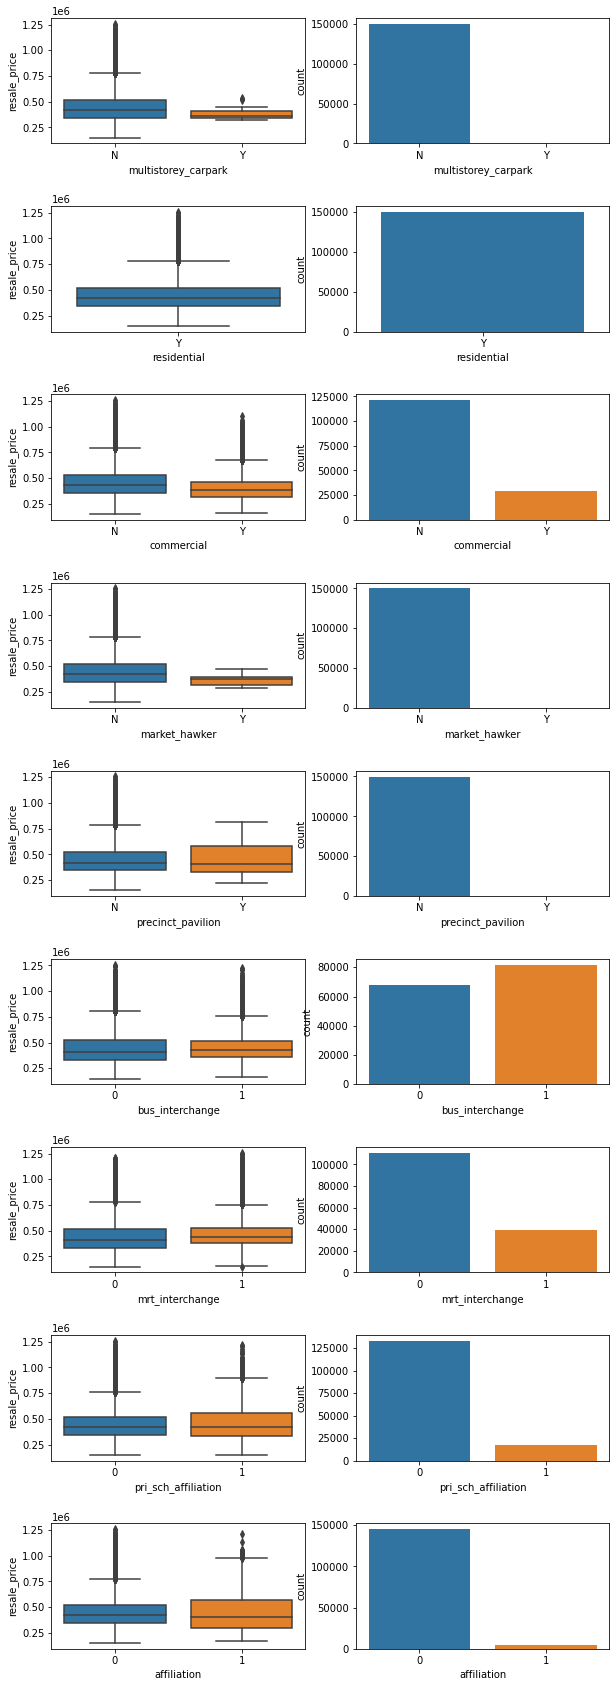

In [20]:
subplot_cat(hdb, ["multistorey_carpark","residential","commercial","market_hawker", 
                  "precinct_pavilion", "bus_interchange", "mrt_interchange", "pri_sch_affiliation", "affiliation"])

From the above box plots, we observe that the categorial distributions of the box plots in these variables are similar. Since there is only 1 categorial outcome for the residential column, we can safely discard this feature column from our modelling later on. However, to confirm whether if there are any significant differences for the remaining categorial feature columns with respect to the resale price, we will have to conduct t-test hypothesis testing after modelling to verify. so we will label encode the remaning unencoded categorial features for modelling consideration.

In [21]:
#Label encode all binary outcomes in categorial columns with 1 and 0
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for col in ["multistorey_carpark","commercial","market_hawker", "precinct_pavilion"]:
    hdb[col] = label_encode.fit_transform(hdb[col])
hdb[["multistorey_carpark","commercial","market_hawker", "precinct_pavilion"]].dtypes

multistorey_carpark    int64
commercial             int64
market_hawker          int64
precinct_pavilion      int64
dtype: object

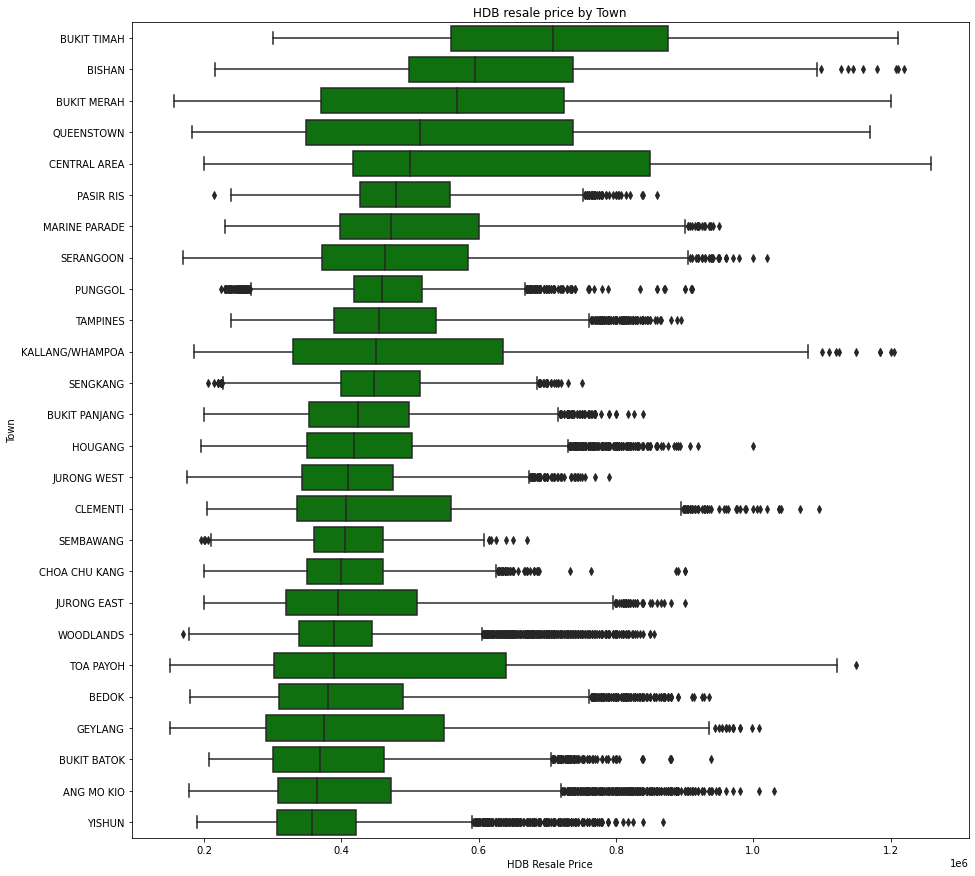

In [22]:
plt.figure(figsize=(15, 15))
price = hdb.groupby('town')['resale_price'].median().sort_values(ascending=False).index
sns.boxplot(data=hdb, x='resale_price', y='town', color='green', orient="h", order=price)
plt.title('HDB resale price by Town')
plt.xlabel('HDB Resale Price')
plt.ylabel('Town')
plt.show()

- We observed that the top 5 towns having the most expensive HDB resale prices come from Mature estates such as Bukit Timah, Bishan, Central Area and Bukit Merah. This indicates that there is probably better connectivity to public transport and nearby amenities in these areas.
- Apart from the top 5 towns, it can be inferred that outlier resale prices can be seen on most of the other HDB estates in Singapore

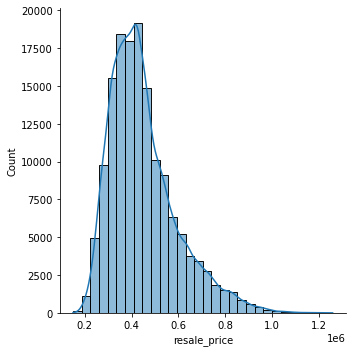

In [23]:
sns.displot(hdb['resale_price'], bins=30, kde=True);

- The above histogram supports the fact that the resale price distribution is slightly left skewed which justifies the presence of outliers. Overall, it is still relatively following a normal distribution

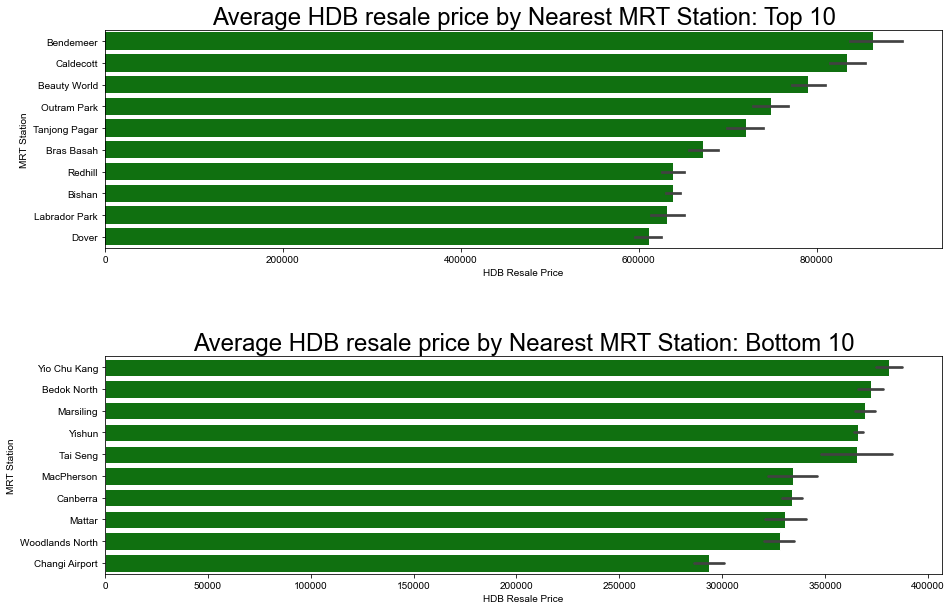

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
top10_price = hdb.groupby('mrt_name')['resale_price'].mean().sort_values(ascending=False).head(10).index
sns.barplot(data=hdb, x='resale_price', y='mrt_name', color='green', orient="h", order=top10_price, ax=ax[0])
sns.set(font_scale=2)
ax[0].set_title('Average HDB resale price by Nearest MRT Station: Top 10')
ax[0].set_xlabel('HDB Resale Price')
ax[0].set_ylabel('MRT Station')

btm10_price = hdb.groupby('mrt_name')['resale_price'].mean().sort_values(ascending=False).tail(10).index
sns.barplot(data=hdb, x='resale_price', y='mrt_name', color='green', orient="h", order=btm10_price, ax=ax[1])
sns.set(font_scale=2)
ax[1].set_title('Average HDB resale price by Nearest MRT Station: Bottom 10')
ax[1].set_xlabel('HDB Resale Price')
ax[1].set_ylabel('MRT Station')

plt.subplots_adjust(hspace=0.5)
plt.show()

Similarly, the top 5 nearest MRT stations have the highest average HDB resale prices as they are located along/close to mature estate areas with better connectivity to public transport and amenity facilities

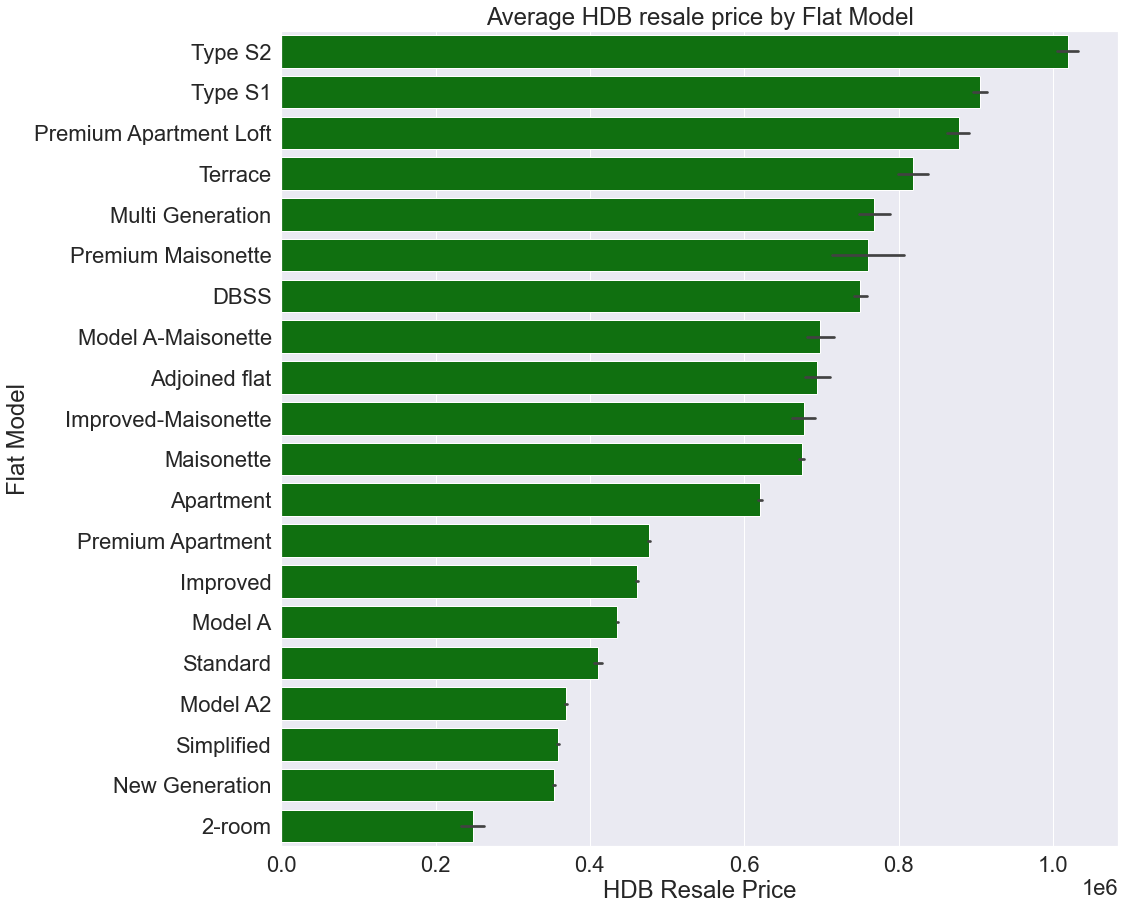

In [25]:
plt.figure(figsize=(15, 15))
price = hdb.groupby('flat_model')['resale_price'].mean().sort_values(ascending=False).index
sns.barplot(data=hdb, x='resale_price', y='flat_model', color='green', orient="h", order=price)
sns.set(font_scale=2)
plt.title('Average HDB resale price by Flat Model')
plt.xlabel('HDB Resale Price')
plt.ylabel('Flat Model')
plt.show()

Type S2, S1, Premium Apartment Loft, Terrace and Multi-Generation flats have emerged as the top 5 most expensive flat models among potential HDB buyers, as they are considered as the newer batch of flats that were bulit by HDB in the later half of the recent decade

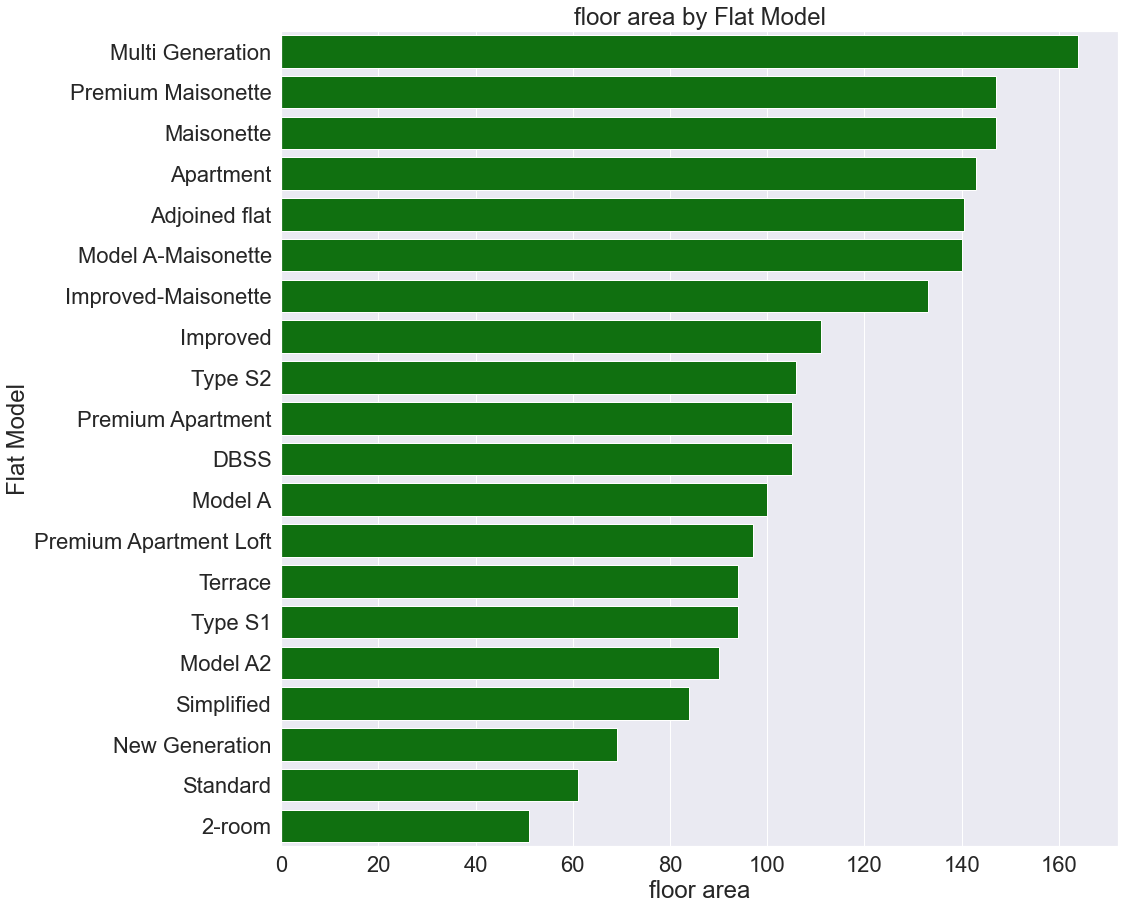

In [26]:
plt.figure(figsize=(15, 15))
area = hdb.groupby('flat_model')[['floor_area_sqm']].median().sort_values(by='floor_area_sqm', ascending=False).reset_index()
sns.barplot(data=area, x='floor_area_sqm', y='flat_model', color='green', orient="h")
sns.set(font_scale=2)
plt.title('floor area by Flat Model')
plt.xlabel('floor area')
plt.ylabel('Flat Model')
plt.show()

We observe that Multi Generation, Maisonette, apartment and adjoined flats have the highest floor area, which was not observed in the previous bar plot when comparing against resale price. This suggests that flat models such as Type S1/S2, Terrace could have been either newly constructed flats, or they may be located at mature estates/central area which could drag up their resale price due close proximity to CBD area.

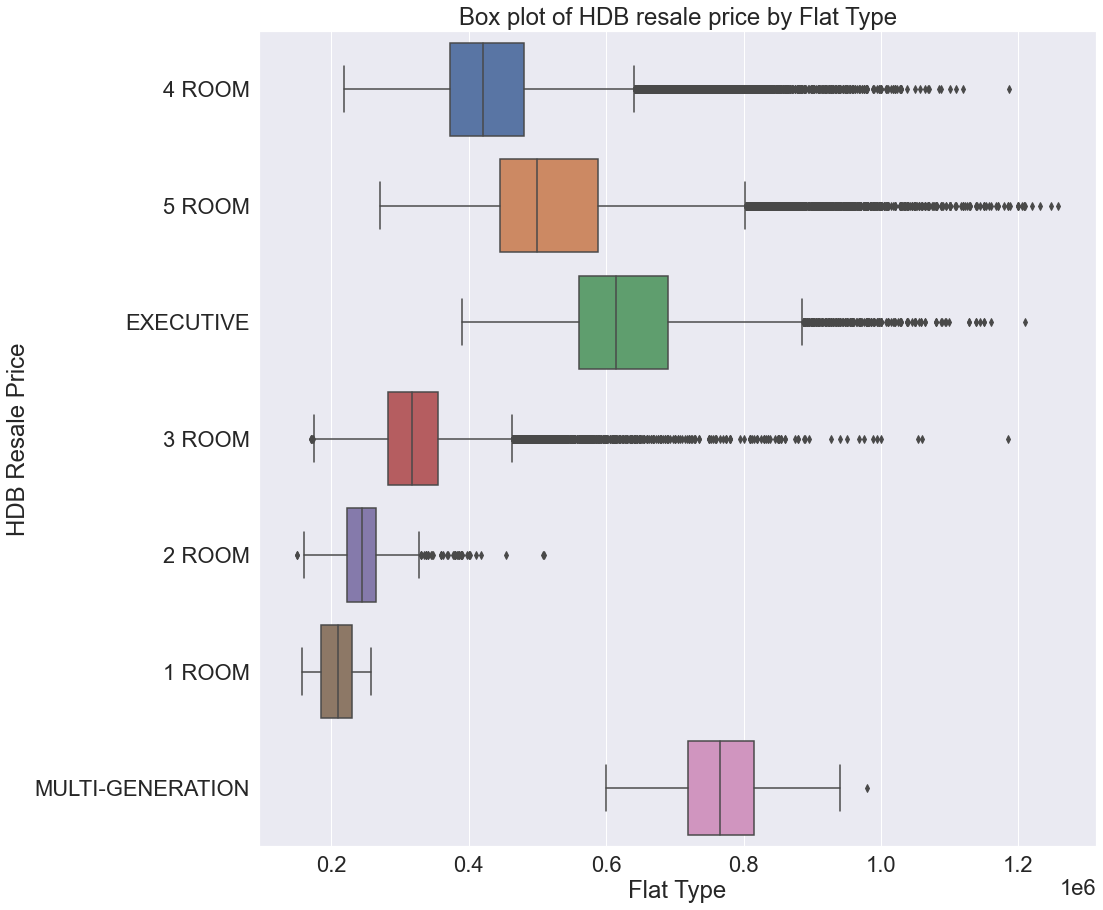

In [27]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=hdb, x='resale_price', y='flat_type')
sns.set(font_scale=2)
plt.title('Box plot of HDB resale price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('HDB Resale Price');

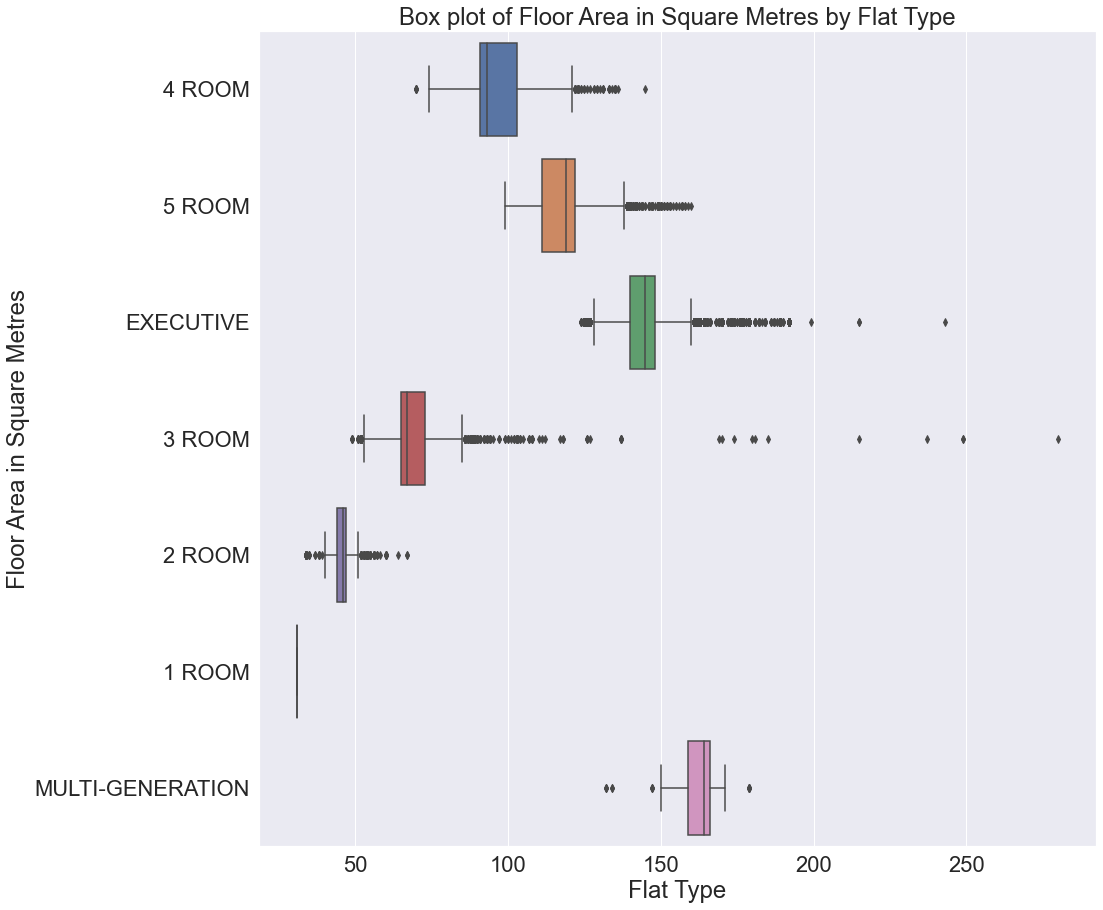

In [28]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=hdb, x='floor_area_sqm', y='flat_type', orient='h')
sns.set(font_scale=2)
plt.title('Box plot of Floor Area in Square Metres by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Floor Area in Square Metres');

The distributions between Flat type with respect to floor area and resale prices are similar in trend, where 1 room flats have the smallest floor area and are fetched at the cheapest price. Executive and Multi-Generation flats have the largest floor area and sold at higher prices

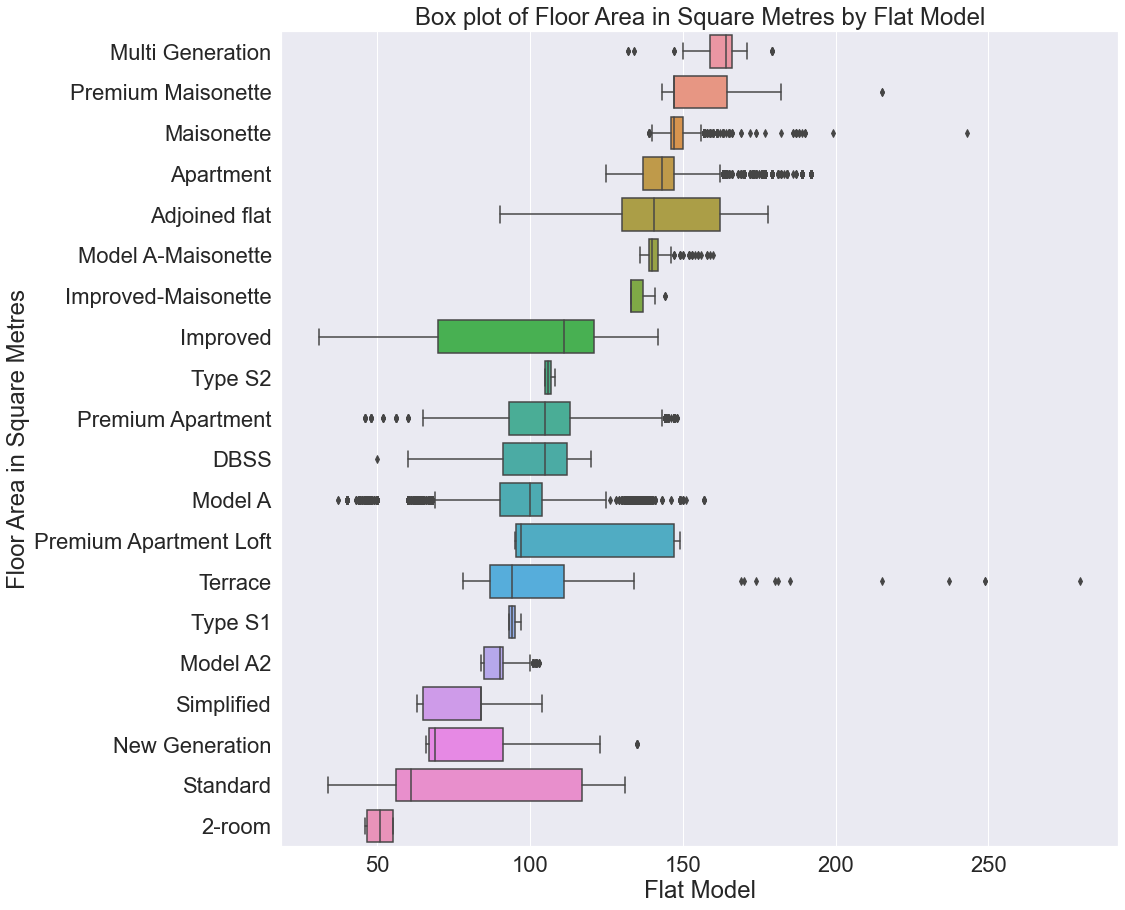

In [29]:
plt.figure(figsize=(15, 15))
order = hdb.groupby('flat_model')[['floor_area_sqm']].median().sort_values(by='floor_area_sqm', ascending=False).index
sns.boxplot(data=hdb, x='floor_area_sqm', y='flat_model', order=order, orient='h');
plt.title('Box plot of Floor Area in Square Metres by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Floor Area in Square Metres');
plt.show()

Box-plot distribution is observed to be similarly related to the previous barplot ranking of Flat Model vs Floor Area

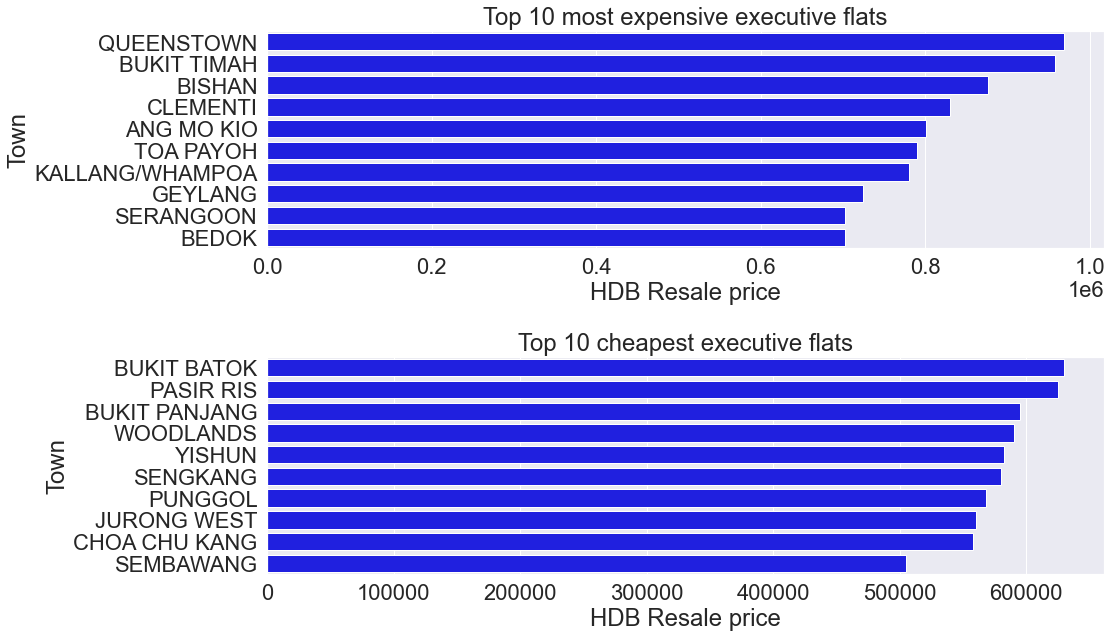

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
top10_exec = hdb[hdb['flat_type'] == 'EXECUTIVE'].groupby('town')[['resale_price']].median().sort_values(by='resale_price', ascending=False).head(10).reset_index()
sns.barplot(data=top10_exec, x='resale_price', y='town', color='blue', orient="h", ax=ax[0])
sns.set(font_scale=2)
ax[0].set_title('Top 10 most expensive executive flats')
ax[0].set_xlabel('HDB Resale price')
ax[0].set_ylabel('Town')

btm10_exec = hdb[hdb['flat_type'] == 'EXECUTIVE'].groupby('town')[['resale_price']].median().sort_values(by='resale_price', ascending=False).tail(10).reset_index()
sns.barplot(data=btm10_exec, x='resale_price', y='town', color='blue', orient="h", ax=ax[1])
sns.set(font_scale=2)
ax[1].set_title('Top 10 cheapest executive flats')
ax[1].set_xlabel('HDB Resale price')
ax[1].set_ylabel('Town')

plt.subplots_adjust(hspace=0.5)
plt.show()

Similarly, we can also observe the top 5 most expensive executive flats coming from mature estates, and top 5 cheapest executive flats coming from non-mature estates

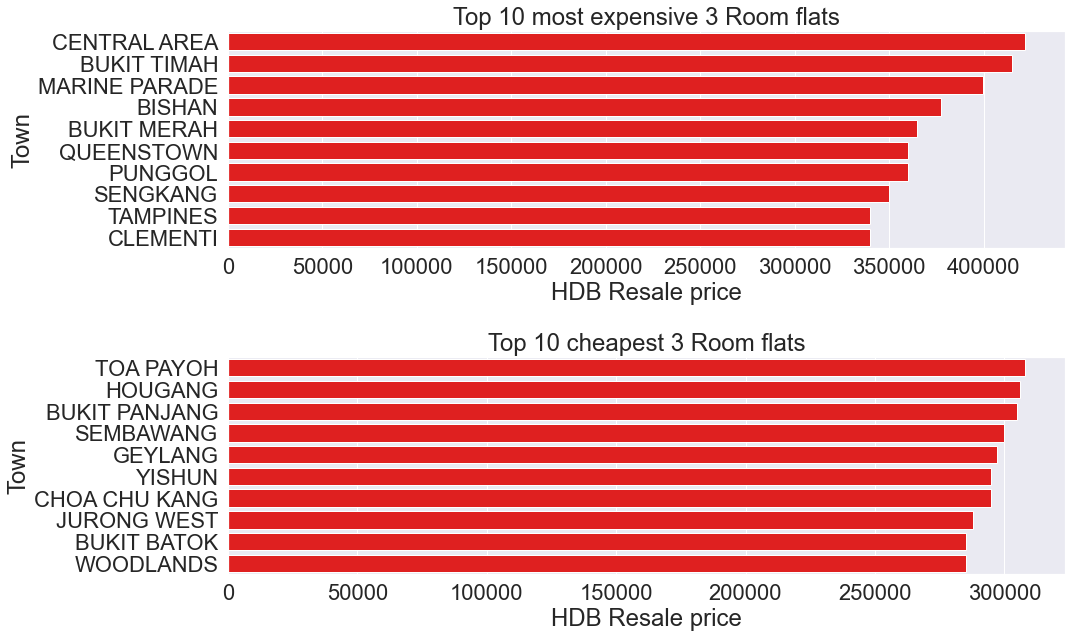

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
top10_3room = hdb[hdb['flat_type'] == '3 ROOM'].groupby('town')[['resale_price']].median().sort_values(by='resale_price', ascending=False).head(10).reset_index()
sns.barplot(data=top10_3room, x='resale_price', y='town', color='red', orient="h", ax=ax[0])
sns.set(font_scale=2)
ax[0].set_title('Top 10 most expensive 3 Room flats')
ax[0].set_xlabel('HDB Resale price')
ax[0].set_ylabel('Town')

btm10_3room = hdb[hdb['flat_type'] == '3 ROOM'].groupby('town')[['resale_price']].median().sort_values(by='resale_price', ascending=False).tail(10).reset_index()
sns.barplot(data=btm10_3room, x='resale_price', y='town', color='red', orient="h", ax=ax[1])
ax[1].set_title('Top 10 cheapest 3 Room flats')
ax[1].set_xlabel('HDB Resale price')
ax[1].set_ylabel('Town')

plt.subplots_adjust(hspace=0.5)
plt.show()

Likewise, we can also observe the top 5 most expensive 3 Room flats coming from mature estates, and top 5 cheapest 3 Room flats coming from non-mature estates

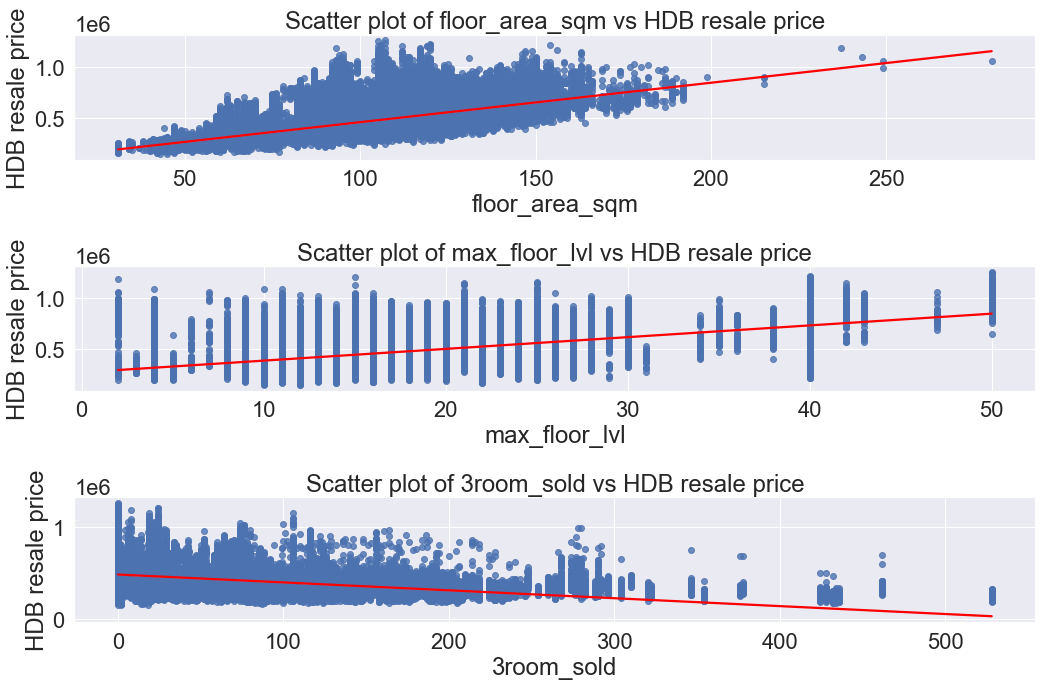

In [32]:
#Initialise 3x1 subplot grid
fig, ax = plt.subplots(3, 1, figsize=(15, 10)) 
#for loop to iterate given list of possbile features, plot the respective scatter plots
for i, x in enumerate(['floor_area_sqm', 'max_floor_lvl', '3room_sold']):
    row = i // 2
    col = i % 2
    sns.regplot(x=x, y='resale_price', data=hdb, ax=ax[i], line_kws={'color': 'red'})
    ax[i].set_title(f'Scatter plot of {x} vs HDB resale price')
    ax[i].set_ylabel('HDB resale price')
    ax[i].set_xlabel(f'{x}')

plt.tight_layout()
plt.show()

- Generally, HDB resale flats with a higher floor area and maximum floor level will be able to fetch a higher price in the local property market.
- According to the scatter plot for 3 room flats, we can observe that the resale price value decreases as more units are sold. This might suggest that 3 room units are of abundant supply in the property market, and thus the price value depreciates uptill a certain threshold value of around 250 units.

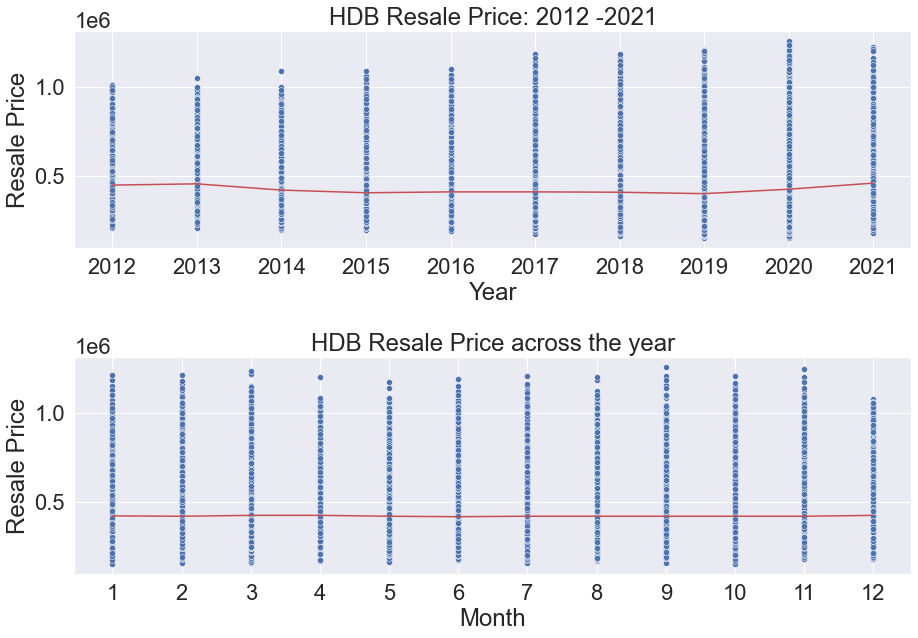

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
order0 = hdb.groupby('Tranc_Year')[['resale_price']].median().sort_values(by='Tranc_Year', ascending=True).reset_index()
sns.scatterplot(data=hdb, x='Tranc_Year', y='resale_price', ax=ax[0])
sns.lineplot(data=order0, x='Tranc_Year', y='resale_price', ax=ax[0], color='r')
ax[0].set_title('HDB Resale Price: 2012 -2021')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Resale Price')
ax[0].set_xticks(order0['Tranc_Year'])

order1 = hdb.groupby('Tranc_Month')[['resale_price']].median().sort_values(by='Tranc_Month', ascending=False).reset_index()
sns.scatterplot(data=hdb, x='Tranc_Month', y='resale_price', ax=ax[1])
sns.lineplot(data=order1, x='Tranc_Month', y='resale_price', ax=ax[1], color='r')
ax[1].set_title('HDB Resale Price across the year')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Resale Price')
ax[1].set_xticks(order1['Tranc_Month'])

plt.subplots_adjust(hspace=0.5)
plt.show()

- HDB prices across the past decade and throughout the months are observed to be relatively consistent, and this signifies that it will not impact the prediction in the final resale price during our modelling.
- However, it can be inferred that the maximum HDB resale price has been steadily increasing, which could be plausibly due to rising demand for property market, as well as newer flat models that can be fetching for higher prices.

/var/folders/9p/c0_nrg612wgdbjkrj5ttb5z40000gn/T/ipykernel_37698/1672645722.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


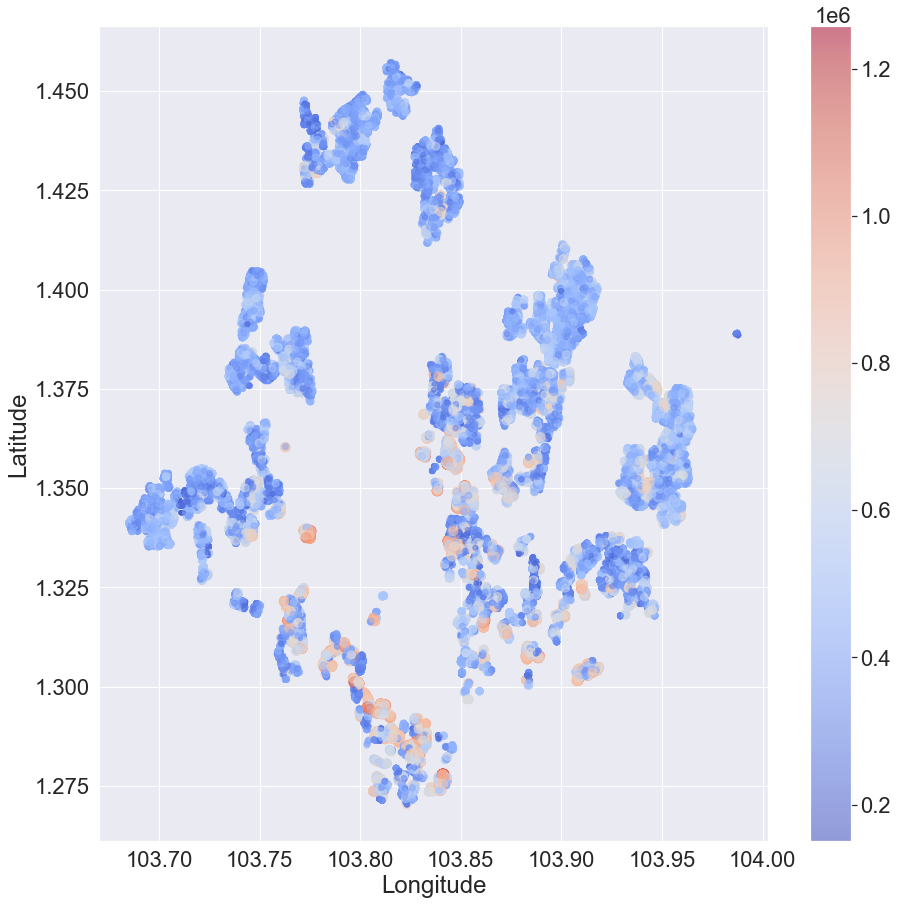

In [34]:
import matplotlib.colors as colors

plt.figure(figsize=(15, 15))
#cmap = plt.cm.get_cmap('plasma')
normalize = colors.Normalize(vmin=hdb['resale_price'].min(), vmax=hdb['resale_price'].max())
plt.scatter(hdb['Longitude'], hdb['Latitude'], s=hdb['resale_price']/10000, alpha=0.5, c=hdb['resale_price'], cmap='coolwarm', norm=normalize)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

HDB resale flats that fetch a higher price in the market are mostly clustered around the cental and southern areas of Singapore based on the above Latitude vs Longitude plot

## Feature Engineering

We will be creating new features such as classifying the different towns into whether they are mature estates or not, as well as combining some of the features such as nearest distances to bus stop and MRT station. We are hypothesizing that these might be some the important features that potential buyers will consider when purchasing a new HDB resale flat, so that our clients can tap upon them when proposing a range of prices to them

In [35]:
#Based on context of variables, drop features with similar/duplicated description or redundant columns like latitude/longtitude
new_hdb = hdb.drop(columns=['bus_stop_name', 'mid_storey', 'id', 'address', 'bus_stop_name', 
                            'street_name', 'Tranc_YearMonth', 'floor_area_sqft', 'pri_sch_name', 
                            'sec_sch_name', 'postal', 'Latitude', 'Longitude', 'mrt_latitude', 
                            'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 
                            'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude', 'block', 
                            'price_per_sqft', 'upper', 'lower', 'mid'])
new_hdb.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'Tranc_Year', 'Tranc_Month',
       'full_flat_type', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'planning_area', 'Mall_Nearest_Distance',
       'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km',
       'Hawker_Nearest_Distance', 'Hawker_Within_500m', 'Hawker_Within_1km',
       'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affil

In [36]:
#split the flat_type string and retrive its first index
new_hdb['flat_type'] = new_hdb['flat_type'].str.split(' ').str[0]
new_hdb['flat_type'].dtype

dtype('O')

In [37]:
#custom function to classify the different flat types
def room_grp(x):
    if x == '1' or x == '2' or x == '3':
        return 'Small'
    elif x == '4' or x == '5' or x == 'EXECUTIVE':
        return 'Medium'
    else:
        return 'Large'

In [38]:
#map the classes into new column
new_hdb['room_size'] = new_hdb['flat_type'].apply(room_grp)
new_hdb['room_size'] = new_hdb['room_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})
new_hdb['room_size'].value_counts()

1    108875
0     40874
2        56
Name: room_size, dtype: int64

In [39]:
# create a dictionary of unique values and their integer index for the various storey range
unique_val = sorted(new_hdb['storey_range'].unique())
storey_dict = {val: k for k, val in enumerate(unique_val)}

# map the column to the dictionary
new_hdb['storey_range'] = new_hdb['storey_range'].map(storey_dict)

In [40]:
#custom function to map the different towns based on whether they are mature estates or not
town_list = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 
                 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 
                 'TAMPINES', 'TOA PAYOH']
new_hdb['Mature_Estate'] = new_hdb['town'].apply(lambda x: 1 if x in town_list else 0)

In [41]:
#Create new features from existing variables to improve the modelling process(feature description as below):
#remaining_lease: Number of remaining lease years of the flat
#amenities_within_2km: Combined malls and hawker centers within 2km radius
#public_tpt_dis: Average distance to nearest public transport
new_hdb['remaining_lease'] = new_hdb['lease_commence_date'] + 99 - new_hdb['Tranc_Year']
new_hdb['amenities_within_2km'] = new_hdb['Mall_Within_2km'] + new_hdb['Hawker_Within_2km']
new_hdb['public_tpt_dist'] = (new_hdb['mrt_nearest_distance'] + new_hdb['bus_stop_nearest_distance']) / 2

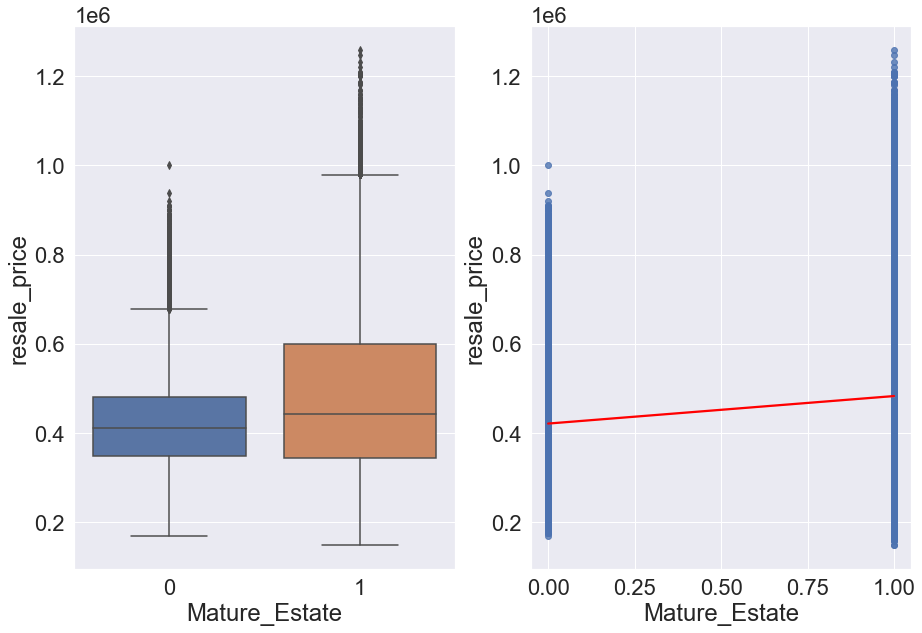

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10)) 
sns.boxplot(data=new_hdb, x='Mature_Estate', y='resale_price', ax=ax[0]);
sns.regplot(data=new_hdb, y='resale_price', x='Mature_Estate', line_kws={'color': 'red'}, ax=ax[1])
plt.show()

- Based on the above plots, we can observe that there is little significance to the resale price between whether a flat is classified as a mature estate or not. This implies that the feature might not have notable impact to the value of the HDB resale flat, but we will still be considering it for modelling later due to lack of strong correlation features as referenced from our earlier correlation table

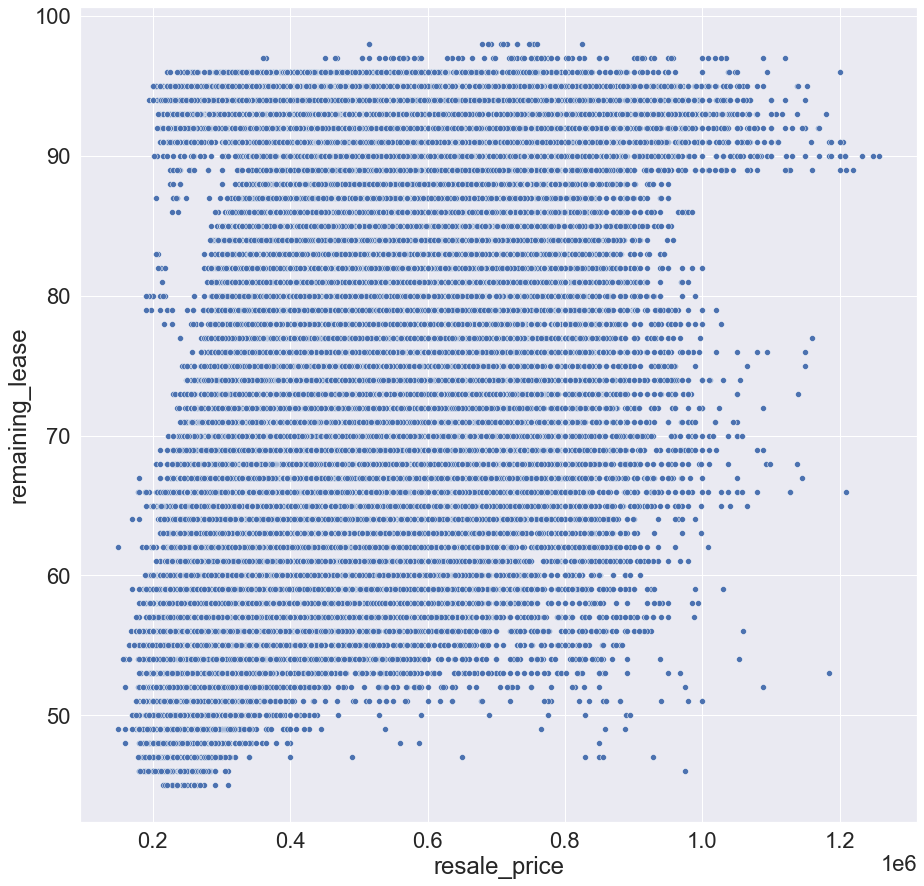

In [43]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=new_hdb, y='remaining_lease', x='resale_price');
sns.set(font_scale=2)

Similarly, we will be taking the remaining lease lifetime of the flat into consideration based on our earlier analysis

In [44]:
corr = new_hdb.corr()[['resale_price']]
corr[(corr['resale_price'] >= 0.1) | (corr['resale_price'] <= -0.1)].sort_values(by='resale_price', ascending=False)

,resale_price
resale_price,1.000000
floor_area_sqm,0.656776
room_size,0.541325
max_floor_lvl,0.495537
5room_sold,0.360818
remaining_lease,0.360510
year_completed,0.351797
lease_commence_date,0.348430
storey_range,0.346338
exec_sold,0.339819


- Based on all of our earlier analysis, we will be setting the pearson correlation magnitude threshold of 0.1 for consideration to be passed in for Linear Regression fitting and its optimisation machine learning algorithm techniques later on during modelling

In [45]:
new_hdb.describe()

,storey_range,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,room_size,Mature_Estate,remaining_lease,amenities_within_2km,public_tpt_dist
count,149805.000000,149805.000000,149805.000000,1.498050e+05,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000
mean,3.709923,97.228022,1992.316638,4.486621e+05,2016.466513,6.586756,28.683362,15.107914,1990.789994,0.191930,0.000100,0.000280,0.000754,124.592070,0.139581,1.765615,39.277033,49.927406,26.304082,5.973486,0.024105,0.431054,0.063963,0.625827,0.059577,0.000340,664.239826,0.490097,1.796669,5.197650,1167.736858,0.490357,1.409532,3.801242,48.701746,58.293308,764.021115,0.545095,0.261453,115.194170,394.903494,55.308948,0.113187,507.628791,210.131070,0.031935,0.727526,0.442722,74.850125,8.998892,439.607643
std,2.998246,24.438881,12.040577,1.432125e+05,2.742246,3.339708,12.040577,6.194526,12.102331,0.393819,0.010006,0.016742,0.027455,58.309788,5.964397,11.685666,68.858414,45.237296,33.489464,19.179633,1.138619,5.211552,2.033778,11.224543,0.669054,0.024372,368.739209,0.729616,1.421038,3.469713,1071.185899,0.767145,1.711411,4.009217,19.150471,55.513732,429.111674,0.497964,0.439428,55.564721,234.186949,17.883460,0.316822,308.752257,20.005265,0.175827,0.446073,0.496710,11.824823,5.893456,217.491628
min,0.000000,31.000000,1966.000000,1.500000e+05,2012.000000,1.000000,3.000000,2.000000,1949.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,0.000000,0.000000,21.971410,0.000000,0.000000,9.001285,45.668324,20.000000,0.000000,38.913475,188.000000,0.000000,0.000000,0.000000,45.000000,1.000000,25.224975
25%,2.000000,75.000000,1984.000000,3.460000e+05,2014.000000,4.000000,20.000000,12.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,391.473823,0.000000,1.000000,3.000000,371.492143,0.000000,0.000000,1.000000,40.000000,0.000000,458.086393,0.000000,0.000000,74.959608,227.083163,44.000000,0.000000,289.176378,188.000000,0.000000,0.000000,0.000000,66.000000,5.000000,285.399353
50%,4.000000,95.000000,1990.000000,4.200000e+05,2017.000000,7.000000,31.000000,13.000000,1988.000000,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,602.818388,0.000000,2.000000,5.000000,776.137748,0.000000,1.000000,2.000000,43.000000,52.000000,681.853546,1.000000,0.000000,107.686727,348.724666,54.000000,0.000000,446.671027,208.000000,0.000000,1.000000,0.000000,74.000000,8.0

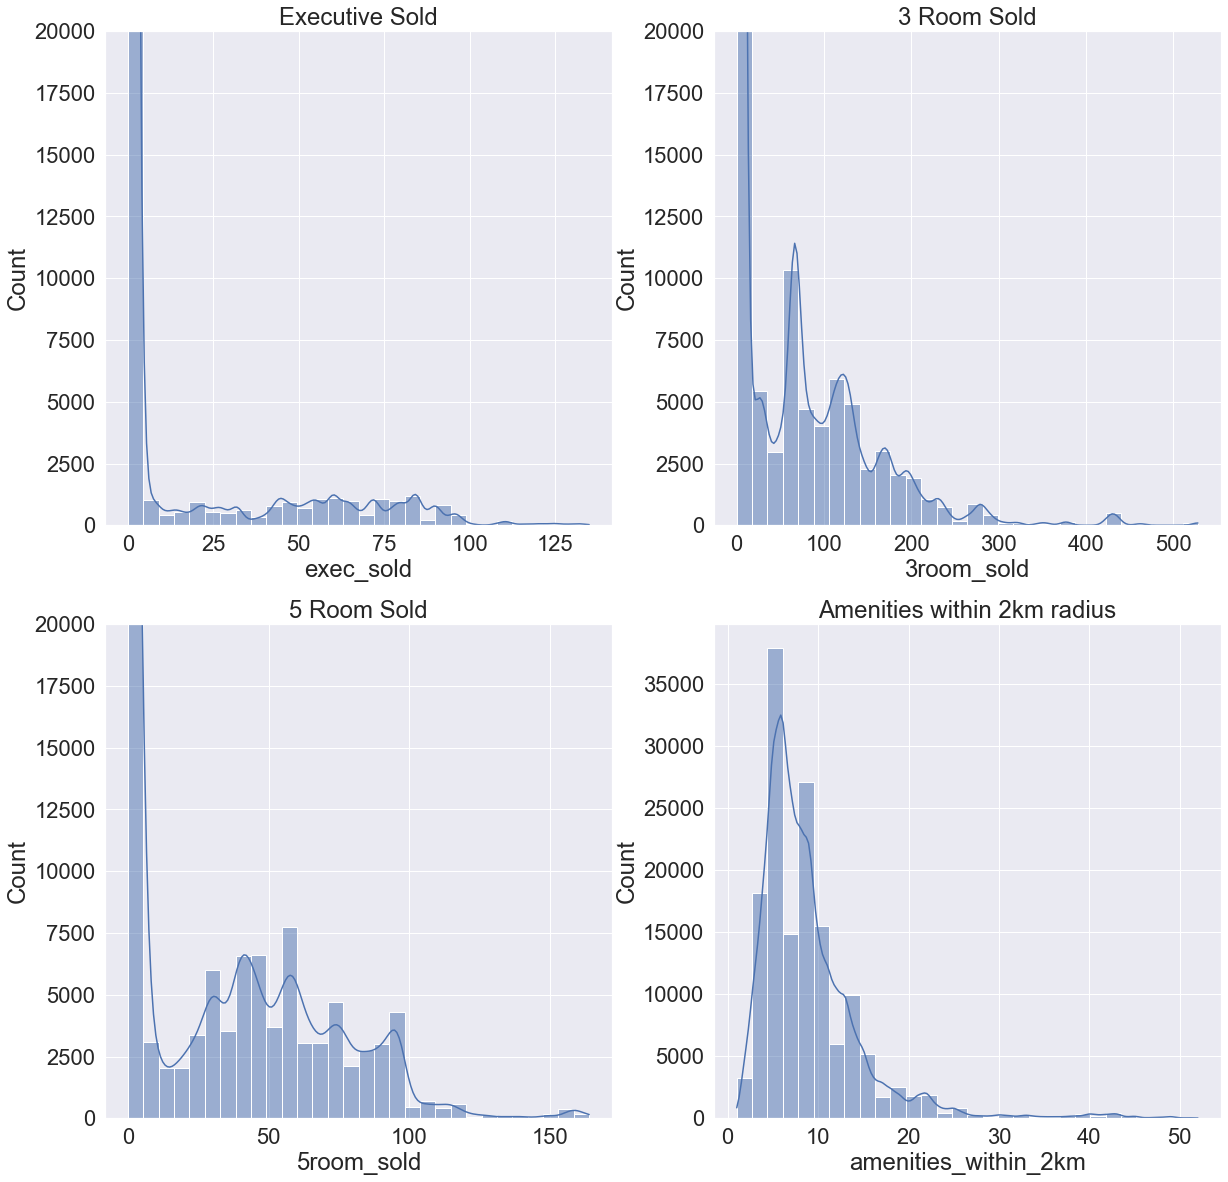

In [46]:
# create subplots with larger figure size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# plot each variable
sns.histplot(new_hdb['exec_sold'], bins=30, kde=True, ax=axs[0,0])
sns.histplot(new_hdb['3room_sold'], bins=30, kde=True, ax=axs[0,1])
sns.histplot(new_hdb['5room_sold'], bins=30, kde=True, ax=axs[1,0])
sns.histplot(new_hdb['amenities_within_2km'], bins=30, kde=True, ax=axs[1,1])

# add titles and labels
axs[0,0].set_title('Executive Sold')
axs[0,0].set_ylim(0,20000)
axs[0,1].set_title('3 Room Sold')
axs[0,1].set_ylim(0,20000)
axs[1,0].set_title('5 Room Sold')
axs[1,0].set_ylim(0,20000)
axs[1,1].set_title('Amenities within 2km radius')

plt.show()

- A quick verification on some of these selected features for modelling show that we expect the distributions to be skewed towards the right, indicating outlier points from flats having high amount of units sold from the different HDB flat types and number of amenities within a 2km radius

In [47]:
new_hdb['cbrt_resale_price'] = (hdb['resale_price'])**(1/3)
new_hdb['log_resale_price'] = np.log(new_hdb['resale_price'])

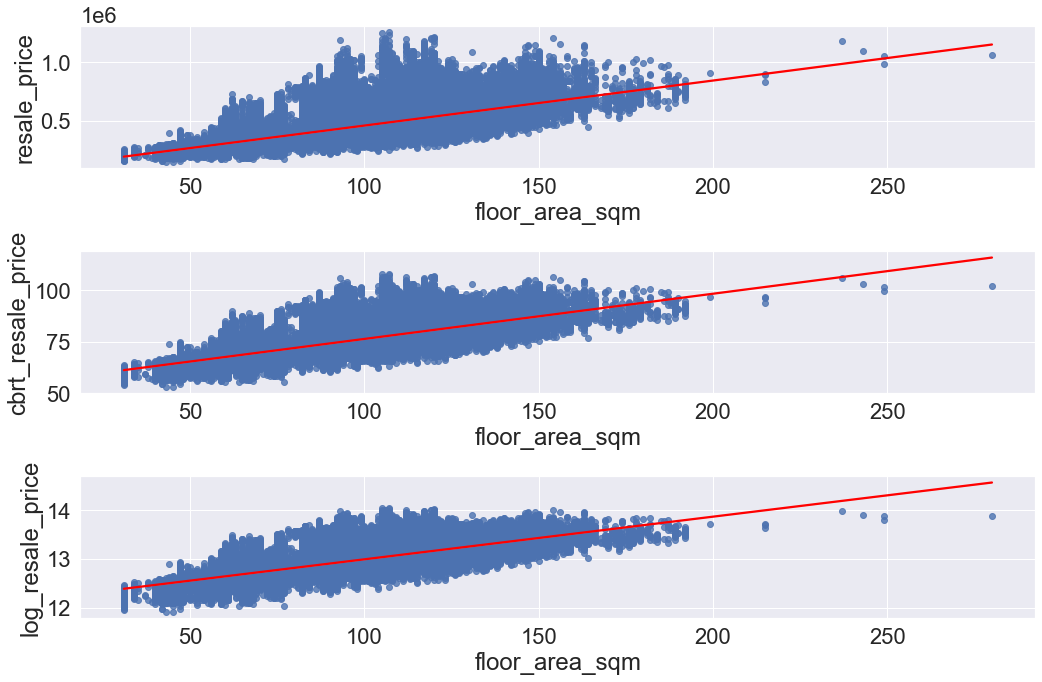

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
sns.regplot(data=new_hdb, y='resale_price', x='floor_area_sqm', line_kws={'color': 'red'}, ax=ax[0]);
sns.regplot(data=new_hdb, y='cbrt_resale_price', x='floor_area_sqm', line_kws={'color': 'red'}, ax=ax[1]);
sns.regplot(data=new_hdb, y='log_resale_price', x='floor_area_sqm', line_kws={'color': 'red'}, ax=ax[2]);
plt.tight_layout()
plt.show()

Although the transformed versions of resale price variable seems to show a smoother distributions between the data points when fitted with a best fit line, and also being able to better handle outliers well, we will instead **proceed to use the default resale price** variable so as to avoid inflating our predicted RMSE score when passing the final predictions in Kaggle platform

## Datasets to be passed for modelling

We will be selecting 2 final sets of datasets and use for them modelling process

In [49]:
#Based on context of variables, drop features with similar/duplicated description or redundant columns like latitude/longtitude
hdb1 = hdb.drop(columns=['bus_stop_name', 'mid_storey', 'id', 'address', 'bus_stop_name', 'full_flat_type', 
                            'planning_area', 'street_name', 'Tranc_YearMonth', 'floor_area_sqft', 'pri_sch_name', 
                            'sec_sch_name', 'full_flat_type', 'postal', 'Latitude', 'Longitude', 'mrt_latitude', 
                            'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 
                            'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude', 'block'])
hdb1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'Tranc_Year', 'Tranc_Month',
       'lower', 'upper', 'mid', 'price_per_sqft', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'residential', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_s

In [50]:
hdb1.corr()[['resale_price']].sort_values(by='resale_price', ascending=False)

,resale_price
resale_price,1.000000
floor_area_sqm,0.656776
price_per_sqft,0.604594
max_floor_lvl,0.495537
5room_sold,0.360818
upper,0.352152
year_completed,0.351797
mid,0.351795
lower,0.351026
lease_commence_date,0.348430


**Dataset 1 (Default features)**

In [51]:
heat_map = hdb1.corr()[['max_floor_lvl', '3room_sold', 'floor_area_sqm', '5room_sold', 'exec_sold', 'upper', 
                        'mid', 'lower', 'lease_commence_date', 'hdb_age', 'year_completed', 'resale_price']].loc[['max_floor_lvl', '3room_sold', 'floor_area_sqm', '5room_sold', 'exec_sold', 'upper', 'mid', 'lower', 'lease_commence_date', 'hdb_age', 'resale_price']]

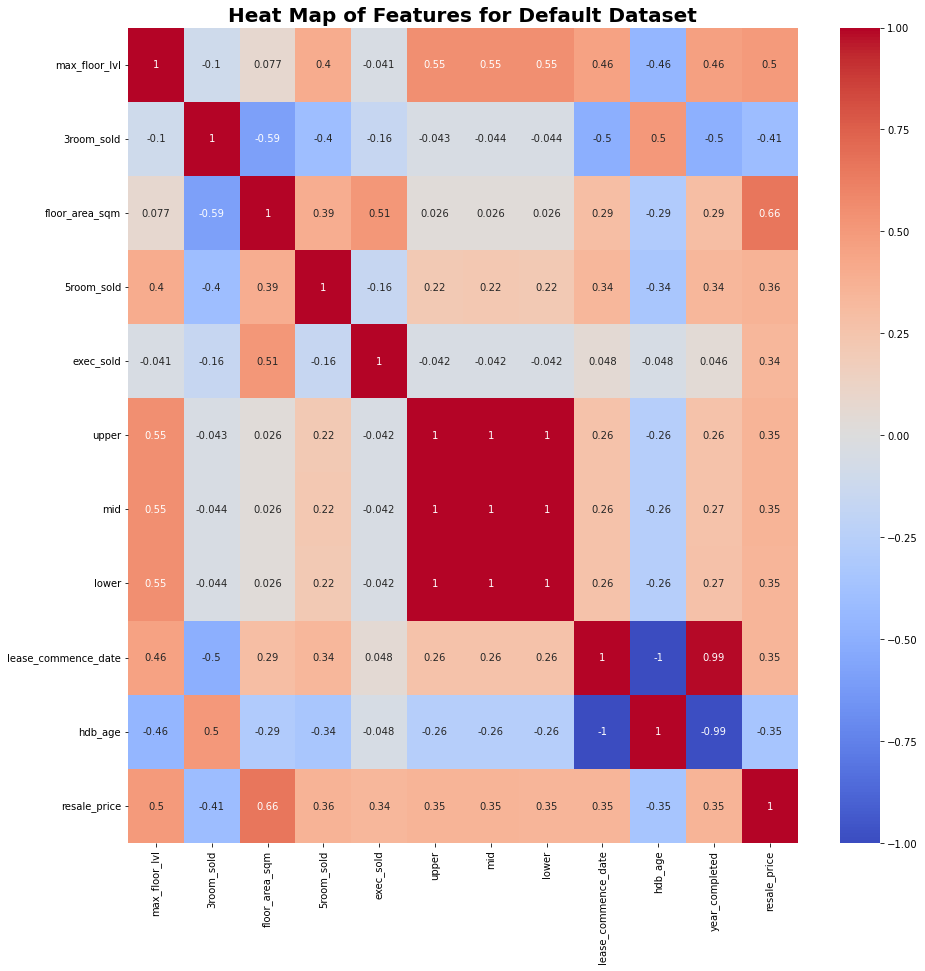

In [52]:
plt.figure(figsize=(15, 15))
sns.reset_defaults()
sns.heatmap(heat_map, annot=True, cmap='coolwarm')
plt.title('Heat Map of Features for Default Dataset',size=20, fontweight="bold")
plt.show()

Multi colinearity is observed for certain continuous features with correlation coefficient of >0.7, so we will be dropping them pass in the remaining ones in our saved csv file

In [53]:
hdb1 = hdb[['max_floor_lvl', '3room_sold', 'floor_area_sqm', '5room_sold', 'exec_sold', 'mid', 
             'lease_commence_date', 'resale_price', 'town']]

In [54]:
hdb1.isnull().sum()

max_floor_lvl          0
3room_sold             0
floor_area_sqm         0
5room_sold             0
exec_sold              0
mid                    0
lease_commence_date    0
resale_price           0
town                   0
dtype: int64

In [55]:
hdb1.to_csv('../datasets/HDB_benchmark.csv', index=False)

**Dataset 2 (With feature engineering)**

In [56]:
heat_map1 = new_hdb.corr()[['remaining_lease', 'max_floor_lvl', '3room_sold', 'floor_area_sqm', 'room_size', 
                           'storey_range', '5room_sold', 'exec_sold', 'Mature_Estate', 'public_tpt_dist', 
                           'amenities_within_2km', 'resale_price', 'Hawker_Nearest_Distance', 'Mall_Nearest_Distance', 
                           'commercial', 'total_dwelling_units', '2room_sold', 'log_resale_price']].loc[[
                           'remaining_lease', 'max_floor_lvl', '3room_sold', 'floor_area_sqm', 'room_size', 
                           'storey_range', '5room_sold', 'exec_sold', 'Mature_Estate', 'public_tpt_dist', 
                           'amenities_within_2km', 'resale_price', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 
                           'commercial', 'total_dwelling_units', '2room_sold', 'log_resale_price']]

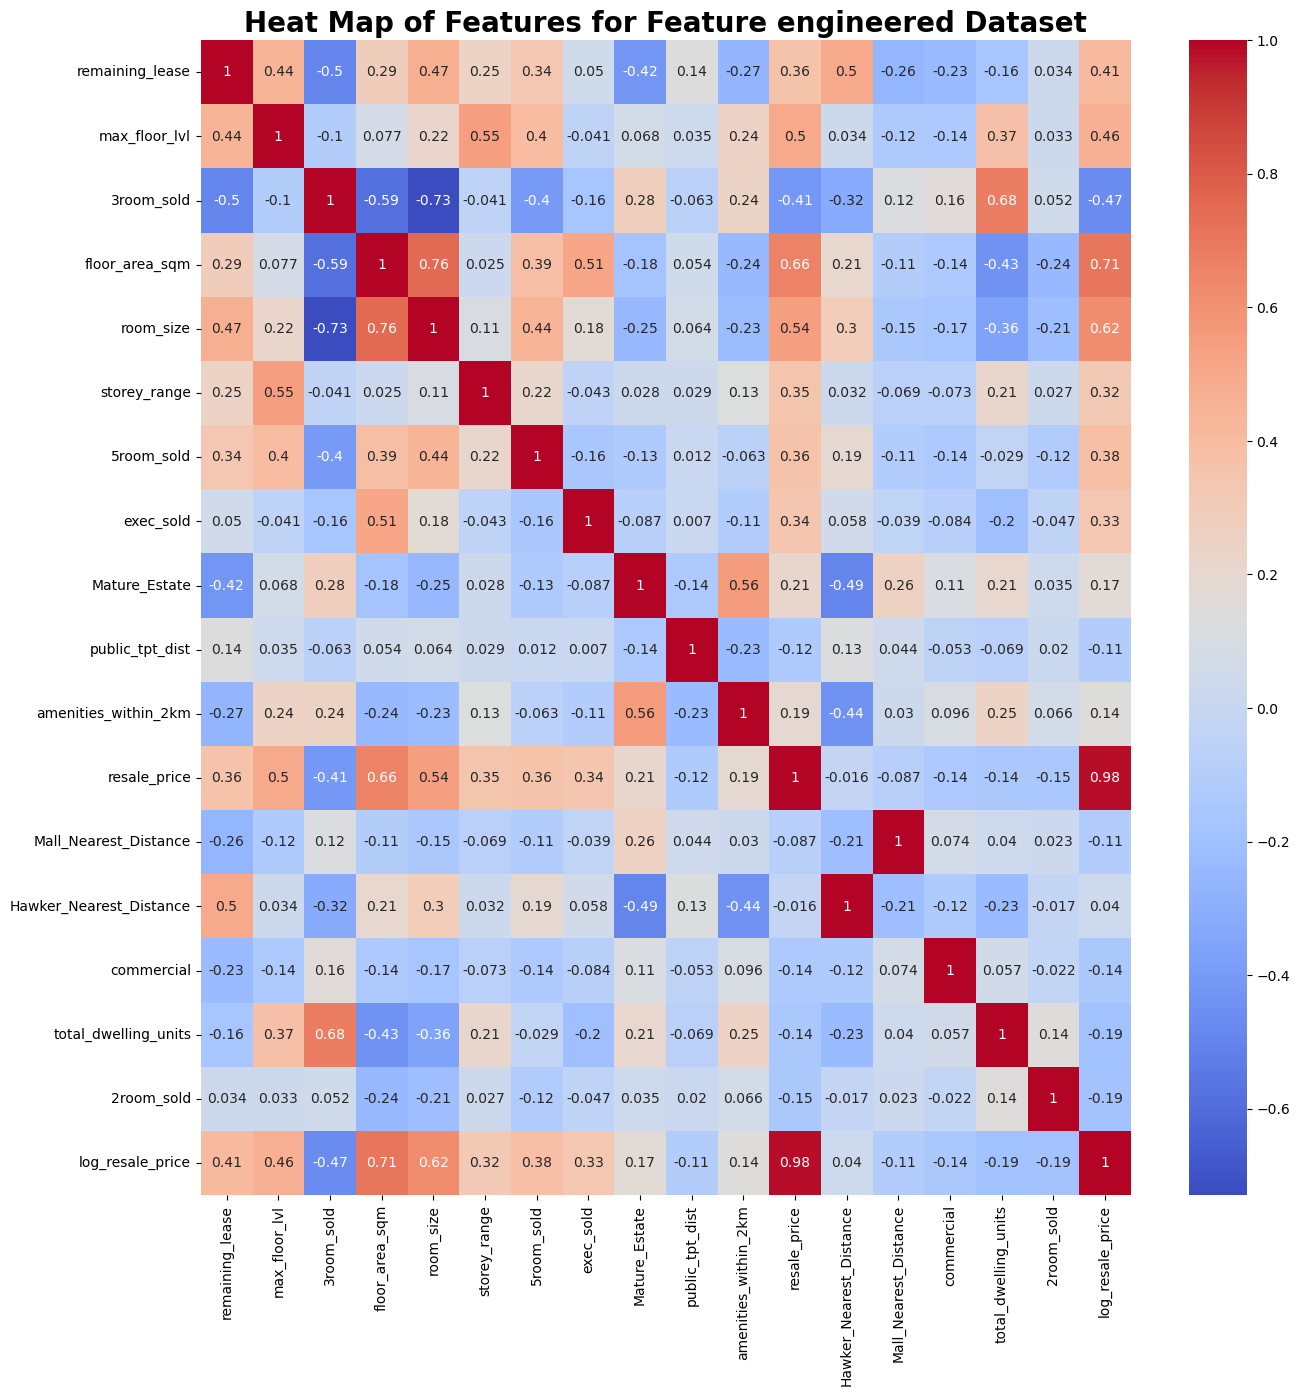

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(heat_map1, annot=True, cmap='coolwarm')
plt.title('Heat Map of Features for Feature engineered Dataset',size=20, fontweight="bold")
plt.show()

Mutli colinearity is observed on room size feature with respect to floor area and 3room sold, so we proceed to exclude this feature from modelling

In [58]:
hdb2 = new_hdb[['remaining_lease', 'max_floor_lvl', '3room_sold', 'floor_area_sqm', 'storey_range', '5room_sold', 
                'exec_sold', 'Mature_Estate', 'public_tpt_dist', 'amenities_within_2km', 'resale_price', 'town', 
                'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'commercial', 
                'total_dwelling_units', '2room_sold', 'full_flat_type']]
hdb2.head()

,remaining_lease,max_floor_lvl,3room_sold,floor_area_sqm,storey_range,5room_sold,exec_sold,Mature_Estate,public_tpt_dist,amenities_within_2km,resale_price,town,Mall_Nearest_Distance,Hawker_Nearest_Distance,commercial,total_dwelling_units,2room_sold,full_flat_type
0,89,25,0,90.0,5,46,0,1,179.755232,20.0,680000.0,KALLANG/WHAMPOA,1094.090418,154.753357,0,142,0,4 ROOM Model A
1,74,9,0,130.0,4,56,0,1,480.933732,10.0,665000.0,BISHAN,866.941448,640.151925,0,112,0,5 ROOM Improved
2,83,16,0,144.0,7,30,60,0,774.499528,5.0,838000.0,BUKIT BATOK,1459.579948,1762.082341,0,90,0,EXECUTIVE Apartment
3,79,11,0,103.0,1,7,0,1,475.425002,13.0,550000.0,BISHAN,950.175199,726.215262,1,75,0,4 ROOM Model A
4,69,4,0,83.0,0,18,0,0,270.882892,3.0,298000.0,YISHUN,729.771895,1540.151439,0,48,0,4 ROOM Simplified


In [59]:
hdb2.isnull().sum()

remaining_lease            0
max_floor_lvl              0
3room_sold                 0
floor_area_sqm             0
storey_range               0
5room_sold                 0
exec_sold                  0
Mature_Estate              0
public_tpt_dist            0
amenities_within_2km       0
resale_price               0
town                       0
Mall_Nearest_Distance      0
Hawker_Nearest_Distance    0
commercial                 0
total_dwelling_units       0
2room_sold                 0
full_flat_type             0
dtype: int64

In [60]:
hdb2.to_csv('../datasets/HDB_FE.csv', index=False)